In [10]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt

np.set_printoptions(formatter={"int": "{:+}".format})

k = 1

In [2]:
possible_spins = [+1, -1]
lattice_points = 4

T = 0.1
J = 1
h = 0.1

configuarations = np.array(list(product(possible_spins, repeat=lattice_points)))

for i in range(len(configuarations)):
    print(configuarations[i])

[+1 +1 +1 +1]
[+1 +1 +1 -1]
[+1 +1 -1 +1]
[+1 +1 -1 -1]
[+1 -1 +1 +1]
[+1 -1 +1 -1]
[+1 -1 -1 +1]
[+1 -1 -1 -1]
[-1 +1 +1 +1]
[-1 +1 +1 -1]
[-1 +1 -1 +1]
[-1 +1 -1 -1]
[-1 -1 +1 +1]
[-1 -1 +1 -1]
[-1 -1 -1 +1]
[-1 -1 -1 -1]


In [3]:
def absolute_energy(configuarations, J, h):
    H = np.zeros(len(configuarations))

    for i in range(len(configuarations)):
        for j in range(len(configuarations[i])):
            H[i] -= (
                J * configuarations[i][j - 1] * configuarations[i][j]
                + h * configuarations[i][j]
            )

    return H


energy = absolute_energy(configuarations, J, h)

for i in range(len(configuarations)):
    print(configuarations[i], "\t", energy[i])

[+1 +1 +1 +1] 	 -4.4
[+1 +1 +1 -1] 	 -0.20000000000000018
[+1 +1 -1 +1] 	 -0.20000000000000007
[+1 +1 -1 -1] 	 0.0
[+1 -1 +1 +1] 	 -0.20000000000000007
[+1 -1 +1 -1] 	 4.0
[+1 -1 -1 +1] 	 0.0
[+1 -1 -1 -1] 	 0.20000000000000007
[-1 +1 +1 +1] 	 -0.20000000000000018
[-1 +1 +1 -1] 	 0.0
[-1 +1 -1 +1] 	 4.0
[-1 +1 -1 -1] 	 0.20000000000000007
[-1 -1 +1 +1] 	 0.0
[-1 -1 +1 -1] 	 0.20000000000000007
[-1 -1 -1 +1] 	 0.20000000000000007
[-1 -1 -1 -1] 	 -3.6


In [4]:
def partition_function(configuarations, T):
    energy = absolute_energy(configuarations, J, h)

    Z = 0
    for i in range(len(configuarations)):
        Z += np.exp(-energy[i] / (k * T))

    return Z


print("Partition Function:", partition_function(configuarations, T))

Partition Function: 1.2855911345906424e+19


In [5]:
def configuaration_probabilities(configuarations, T):
    energy = absolute_energy(configuarations, J, h)
    Z = partition_function(configuarations, T)

    probabilities = np.empty(len(configuarations))
    for i in range(len(configuarations)):
        probabilities[i] = np.exp(-energy[i] / (k * T)) / Z

    return probabilities


probabilities = configuaration_probabilities(configuarations, T)

for i in range(len(configuarations)):
    print(configuarations[i], "\t", probabilities[i])

[+1 +1 +1 +1] 	 0.9996646498695335
[+1 +1 +1 -1] 	 5.747594161252119e-19
[+1 +1 -1 +1] 	 5.747594161252111e-19
[+1 +1 -1 -1] 	 7.778522837421555e-20
[+1 -1 +1 +1] 	 5.747594161252111e-19
[+1 -1 +1 -1] 	 3.304592059624267e-37
[+1 -1 -1 +1] 	 7.778522837421555e-20
[+1 -1 -1 -1] 	 1.0527085913649059e-20
[-1 +1 +1 +1] 	 5.747594161252119e-19
[-1 +1 +1 -1] 	 7.778522837421555e-20
[-1 +1 -1 +1] 	 3.304592059624267e-37
[-1 +1 -1 -1] 	 1.0527085913649059e-20
[-1 -1 +1 +1] 	 7.778522837421555e-20
[-1 -1 +1 -1] 	 1.0527085913649059e-20
[-1 -1 -1 +1] 	 1.0527085913649059e-20
[-1 -1 -1 -1] 	 0.00033535013046647805


In [6]:
def average_energy(configuarations, T):
    energy = absolute_energy(configuarations, J, h)
    probabilities = configuaration_probabilities(configuarations, T)

    E = 0
    for i in range(len(configuarations)):
        E += energy[i] * probabilities[i]

    return E


print("Average Energy:", average_energy(configuarations, T))

Average Energy: -4.399731719895628


In [7]:
def absolute_magnetisation(configuarations):
    M = np.empty(len(configuarations))

    for i in range(len(configuarations)):
        M[i] = np.sum(configuarations[i]) / len(configuarations)

    return M


M = absolute_magnetisation(configuarations)

for i in range(len(configuarations)):
    print(configuarations[i], "\t", M[i])

[+1 +1 +1 +1] 	 0.25
[+1 +1 +1 -1] 	 0.125
[+1 +1 -1 +1] 	 0.125
[+1 +1 -1 -1] 	 0.0
[+1 -1 +1 +1] 	 0.125
[+1 -1 +1 -1] 	 0.0
[+1 -1 -1 +1] 	 0.0
[+1 -1 -1 -1] 	 -0.125
[-1 +1 +1 +1] 	 0.125
[-1 +1 +1 -1] 	 0.0
[-1 +1 -1 +1] 	 0.0
[-1 +1 -1 -1] 	 -0.125
[-1 -1 +1 +1] 	 0.0
[-1 -1 +1 -1] 	 -0.125
[-1 -1 -1 +1] 	 -0.125
[-1 -1 -1 -1] 	 -0.25


In [8]:
def average_magnetisation(configuarations, T):
    magnetisation = absolute_magnetisation(configuarations)
    probabilities = configuaration_probabilities(configuarations, T)

    M = 0
    for i in range(len(configuarations)):
        M += magnetisation[i] * probabilities[i]

    return M


print("Average Magnetisation:", average_magnetisation(configuarations, T))

Average Magnetisation: 0.24983232493476676


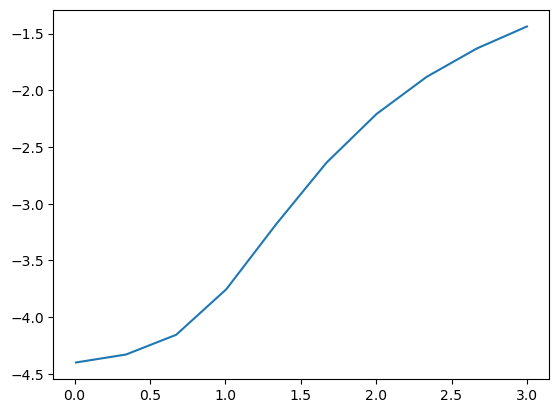

In [20]:
T_i = 0.01
T_f = 3

T = np.linspace(T_i, T_f, 10)
E = np.empty(len(T))

for i in range(len(T)):
    E[i] = average_energy(configuarations, T[i])

plt.plot(T, E)
plt.show()

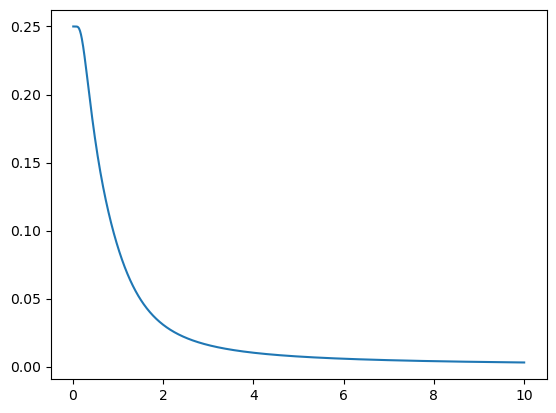

In [19]:
M = np.empty(len(T))

for i in range(len(T)):
    M[i] = average_magnetisation(configuarations, T[i])

plt.plot(T, M)
plt.show()